In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import os

# Function to read flagstat file and calculate ratios
def read_flagstat(file_path):
    with open(file_path, 'r') as file:
        lines = file.readlines()
    
    total_reads = int(lines[0].split()[0])
    mapped_reads = int(lines[7].split()[0])
    singletons = int(lines[13].split()[0])
    discordants = int(lines[15].split()[0])
    
    mapped_ratio = mapped_reads / total_reads
    singleton_ratio = singletons / total_reads
    discordant_ratio = discordants / total_reads
    
    return mapped_ratio, singleton_ratio, discordant_ratio


In [11]:
# Depths and corresponding directories
base_directory="/n/data1/bch/genetics/lee/projects/SMaHT/data/SMaHT_DAC_HapMap/illuminaNovaseq_bulkWgs_400x"

depths = [400, 300, 200, 100, 50]

        
# Data storage
data = {
    'Depth': [],
    'Metric': [],
    'Ratio': []
}

# Reading flagstat files and calculating ratios
for depth in depths:
    if depth == 400:
        file_path = os.path.join(base_directory, "HapMapMix.flagstat")
    else:
        file_path = os.path.join(os.path.join(base_directory,f"{depth}x"), "HapMapMix.flagstat")
    if os.path.exists(file_path):
        mapped_ratio, singleton_ratio, discordant_ratio = read_flagstat(file_path)
        data['Depth'].extend([depth, depth, depth])
        data['Metric'].extend(['Mapped Ratio', 'Singleton Ratio', 'Discordant Ratio'])
        data['Ratio'].extend([mapped_ratio, singleton_ratio, discordant_ratio])
    else:
        print(f"File not found: {file_path}")

# Creating a DataFrame
df = pd.DataFrame(data)


In [14]:
df

,Depth,Metric,Ratio
0,400,Mapped Ratio,0.993453
1,400,Singleton Ratio,0.000887
2,400,Discordant Ratio,0.005870
3,300,Mapped Ratio,0.993453
4,300,Singleton Ratio,0.000887
5,300,Discordant Ratio,0.005870
6,200,Mapped Ratio,0.993453
7,200,Singleton Ratio,0.000887
8,200,Discordant Ratio,0.005869
9,100,Mapped Ratio,0.993453


findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: 

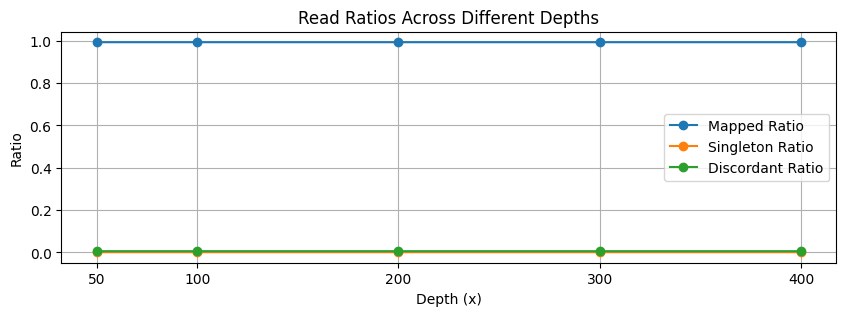

In [18]:
# Plotting
plt.figure(figsize=(10, 3))
for metric in df['Metric'].unique():
    subset = df[df['Metric'] == metric]
    plt.plot(subset['Depth'], subset['Ratio'], marker='o', label=metric)

plt.title('Read Ratios Across Different Depths')
plt.xlabel('Depth (x)')
plt.ylabel('Ratio')
plt.xticks(depths)
plt.legend()
plt.grid(True)
plt.show()

In [19]:
import plotly.graph_objects as go

In [49]:
plt.figure(figsize=(3, 3))


# Plotting with Plotly
fig = go.Figure()

for metric in df['Metric'].unique():
    
    print(metric)
    subset = df[df['Metric'] == metric]
    fig.add_trace(go.Scatter(
        x=subset['Depth'],
        y=subset['Ratio'],
        mode='lines+markers+text',
        name=metric,
        text=subset['Ratio'].round(4),
        textposition= ("top center" if metric != "Discordant Ratio" else "bottom center")
    ))

fig.update_layout(
    title='Read Ratios Across Different Sequencing Depths',
    xaxis_title='Depth (x)',
    yaxis_title='Ratio',
    xaxis=dict(
        tickmode='array',
        tickvals=depths
    ),
    font=dict(family='Helvetica', size=14),
    width=900,
    height=500,
    template= "simple_white"
)

fig.show()

Mapped Ratio
Singleton Ratio
Discordant Ratio


<Figure size 300x300 with 0 Axes>